### import necessary libraries

In [1]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
import matplotlib.pyplot as plt

### preprocessing and EDA

Data 1

In [ ]:
df = pd.read_csv('data/data.csv')

In [ ]:
df.columns

Index(['Text', 'Score', 'Suggestion'], dtype='object')

In [ ]:
maindf = df[['Text','Score']]

In [ ]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3261 entries, 0 to 3260
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    3261 non-null   object
 1   Score   3261 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 51.1+ KB


In [ ]:
maindf.describe()

,Score
count,3261.000000
mean,74.719411
std,21.514015
min,0.000000
25%,60.000000
50%,80.000000
75%,92.000000
max,100.000000


In [ ]:
maindf.head()

,Text,Score
0,این اولین تجربه من برای خرید ایفون هست امروز...,100
1,خرید این محصول رو توصیه میکنم,84
2,1 ساله این گوشی رو دارم هیچ نقطه ضعفی ازش ند...,60
3,سلام خدمت دوستان این گوشی از همه نظر عالی کیف...,96
4,سلام دوستانی که نگران شکستن صفحه نمایش هستند ا...,92


In [ ]:
maindf['Score'] = (maindf['Score']/10).astype('int')

C:\Users\mahan\AppData\Local\Temp\ipykernel_3768\2667386155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maindf['Score'] = (maindf['Score']/10).astype('int')


In [ ]:
maindf.Score.value_counts()

8     752
6     747
10    492
9     443
7     328
5     155
4     149
2      64
0      55
3      54
1      22
Name: Score, dtype: int64

In [ ]:
maindf.loc[:, 'label'] = maindf['Score'].apply(lambda score: 1 if score >= 6 else -1 if score < 5 else 0 if score == 5 else None)

In [ ]:
maindf.label.value_counts()

 1    2762
-1     344
 0     155
Name: label, dtype: int64

In [6]:
import pandas as pd
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go

In [ ]:
fig = px.bar(
    data_frame=maindf.label.value_counts().rename_axis(['احساس']).reset_index(name='تعداد'),
    x="احساس",
    y="تعداد",
    color="احساس"
)

fig.update_layout(title_text='توزیع داده احساس', title_x=0.5)

pyo.iplot(fig, filename = 'توزیع داده احساس')

In [ ]:
fig = px.pie(maindf.label.value_counts().rename_axis(['احساس']).reset_index(name='تعداد'), values='تعداد', names='احساس', hover_data=['احساس'])
fig.update_layout(title_text="احساس", title_x=0.5)
pyo.iplot(fig, filename = 'توزیع داده احساس')

Data 2

In [ ]:
maindf1=pd.read_csv('data/snappfood_comments_preprocessed.csv')

In [ ]:
maindf1.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
maindf1.label.value_counts()

HAPPY    34916
SAD      34564
Name: label, dtype: int64

In [ ]:
maindf1.head()

,comment,label,label_id,Cleaned
0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,SAD,1.0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح
1,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,HAPPY,0.0,قرار بود 1 ساعته برسه ولی نیم ساعت زودتر از مو...
2,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,SAD,1.0,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...
3,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,HAPPY,0.0,عالی بود همه چه درست و به اندازه و کیفیت خوب، ...
4,شیرینی وانیلی فقط یک مدل بود.,HAPPY,0.0,شیرینی وانیلی فقط یک مدل بود


In [ ]:
maindf1.label_id.replace(1.0,-1,inplace=True)

In [ ]:
maindf1.label_id.replace(0.0,1,inplace=True)

In [ ]:
maindf.rename(columns={'tweet':'text','label':'sentiment'},inplace=True)

In [ ]:
maindf1.rename(columns={'Cleaned':'Text','label_id':'sentiment'},inplace=True)

In [ ]:
maindf.columns

Index(['Text', 'Score', 'sentiment'], dtype='object')

In [ ]:
maindf1.columns

Index(['text', 'label', 'sentiment', 'Text'], dtype='object')

In [ ]:
maindf=maindf[['Text','sentiment']]
maindf1=maindf1[['Text','sentiment']]

In [ ]:
df=pd.concat([maindf,maindf1],axis=0)

In [ ]:
fig = px.bar(
    data_frame=df.sentiment.value_counts().rename_axis(['احساس']).reset_index(name='تعداد'),
    x="احساس",
    y="تعداد",
    color="احساس"
)

fig.update_layout(title_text='توزیع داده احساس', title_x=0.5)

pyo.iplot(fig, filename = 'توزیع داده احساس')

In [ ]:
fig = px.pie(df.sentiment.value_counts().rename_axis(['احساس']).reset_index(name='تعداد'), values='تعداد', names='احساس', hover_data=['احساس'])
fig.update_layout(title_text="احساس", title_x=0.5)
pyo.iplot(fig, filename = 'توزیع داده احساس')

In [ ]:
df.sentiment.value_counts()

 1.0    37678
-1.0    34908
 0.0      155
Name: sentiment, dtype: int64

In [ ]:
df.to_csv('sentiment_dataset.csv',encoding='utf-8-sig')

Neutral Data is very low and dont have any data so we ignore this class

Data is Imbalance so undersample to lower count data

In [3]:
from imblearn.under_sampling import RandomUnderSampler

In [4]:
rus = RandomUnderSampler(sampling_strategy='not minority', random_state=1)
df_balanced, balanced_labels = rus.fit_resample(df[df.sentiment != 0], df[df.sentiment != 0]['sentiment'])

In [7]:
fig = px.bar(df_balanced['sentiment'].value_counts().rename_axis('احساس').reset_index(name='تعداد'), x="احساس", y="تعداد", color="تعداد")
fig.update_layout(title_text="توزیع داده احساس", title_x=0.5)
pyo.iplot(fig, filename = 'توزیع داده احساس')

Train and Test Split

In [10]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [11]:
X = df_balanced['Text']
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X)
X=tokenizer.texts_to_sequences(X)
X=pad_sequences(X,maxlen=100)

In [12]:
label2id={'negetive':-1,'positive':1}
id2label={-1:'negetive',1:'positive'}

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df_balanced['sentiment'], test_size=0.2, random_state=42,stratify=df_balanced['sentiment'])

In [ ]:
len(X_train)

55852

In [ ]:
len(X_test)

13964

In [14]:
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

BiDirectional LSTM

In [15]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv1D, Dropout, Dense, Flatten, LSTM, Bidirectional
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, TensorBoard

In [16]:
rnn_model = keras.Sequential([
    keras.layers.Embedding(input_dim=20000, output_dim=32, input_shape=(X_train.shape[1],)),
    keras.layers.Bidirectional(layers.LSTM(512,return_sequences=True)),
    keras.layers.Bidirectional(layers.LSTM(256,return_sequences=True)),
    keras.layers.Bidirectional(layers.LSTM(128,return_sequences=True)),
    keras.layers.Bidirectional(layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
],name='BILSTM')

In [17]:
rnn_model.summary()

Model: "BILSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           640000    
                                                                 
 bidirectional (Bidirectiona  (None, 100, 1024)        2232320   
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 100, 512)         2623488   
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 100, 256)         656384    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              164352    
 nal)                                                       

In [18]:
rnn_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [19]:
rnn_model.fit(X_train, y_train_cat, epochs=3,
              validation_data=(X_test, y_test_cat),
              validation_steps=30)

Epoch 1/3
1746/1746 [==============================] - 1648s 930ms/step - loss: 0.0061 - accuracy: 0.9994 - val_loss: 4.7684e-07 - val_accuracy: 1.0000
Epoch 2/3
1746/1746 [==============================] - 1606s 919ms/step - loss: 1.1773e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/3
1746/1746 [==============================] - 1605s 919ms/step - loss: 1.0672e-10 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


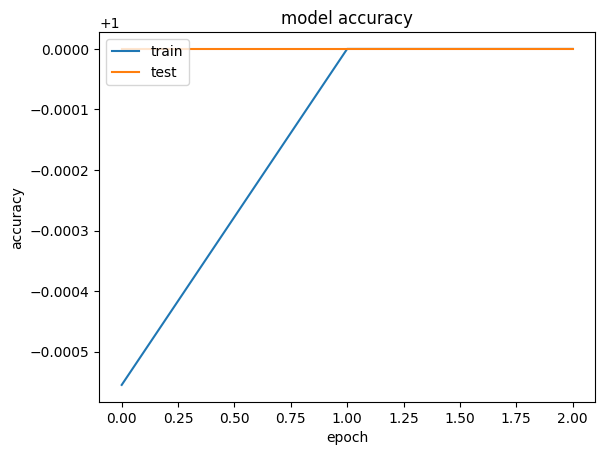

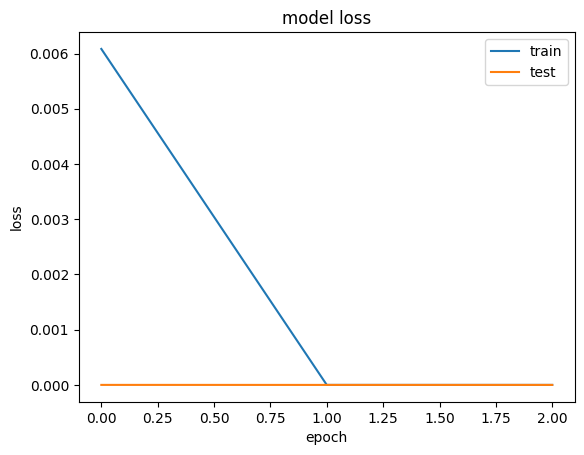

In [20]:
plt.plot(rnn_model.history.history['accuracy'])
plt.plot(rnn_model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(rnn_model.history.history['loss'])
plt.plot(rnn_model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [21]:
rnn_model.save('sentiment.h5')